# Assignment 6. Logistic Regression

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the dataset
bank_data=pd.read_csv('Datasets/bank-full.csv', sep = ';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

## Data Preprocessing & Visualization

In [8]:
# Renaming target variable 'y' to 'Deposit' and moving it to the first position 
dep = bank_data['y']
#Drop the deposit column
bank_data.drop(labels=['y'], axis=1,inplace = True)
bank_data.insert(0, 'Deposit', dep)
bank_data.head()

,Deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [9]:
# Checking how many client has subscribed a term deposit or not
bank_data['Deposit'].value_counts()

no     39922
yes     5289
Name: Deposit, dtype: int64

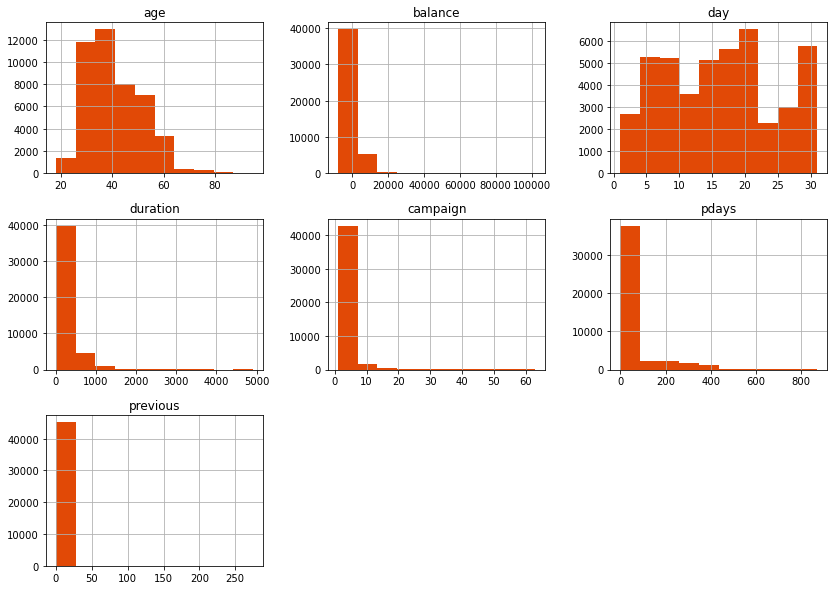

In [10]:
# Plotting numeric data distribution.

bank_data.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

In [11]:
# One-Hot Encoding of categrical variables
data=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome'])
data

,Deposit,age,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,58,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,no,44,no,29,yes,no,5,may,151,1,...,1,0,0,0,0,1,0,0,0,1
2,no,33,no,2,yes,yes,5,may,76,1,...,1,0,0,0,0,1,0,0,0,1
3,no,47,no,1506,yes,no,5,may,92,1,...,0,0,1,0,0,1,0,0,0,1
4,no,33,no,1,no,no,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,no,825,no,no,17,nov,977,3,...,0,1,0,1,0,0,0,0,0,1
45207,yes,71,no,1729,no,no,17,nov,456,2,...,0,0,0,1,0,0,0,0,0,1
45208,yes,72,no,5715,no,no,17,nov,1127,5,...,1,0,0,1,0,0,0,0,1,0
45209,no,57,no,668,no,no,17,nov,508,4,...,1,0,0,0,1,0,0,0,0,1


In [12]:
# To see all columns
pd.set_option("display.max.columns", None)
data

,Deposit,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,58,no,2143,yes,no,5,may,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,no,44,no,29,yes,no,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,no,33,no,2,yes,yes,5,may,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,no,47,no,1506,yes,no,5,may,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,no,33,no,1,no,no,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,no,825,no,no,17,nov,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,yes,71,no,1729,no,no,17,nov,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,yes,72,no,5715,no,no,17,nov,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,no,57,no,668,no,no,17,nov,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
# Convert the columns that contain a Yes or No. (Binary Columns)
def convert_to_int(data, new_column, target_column):
    data[new_column] = data[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

In [14]:
convert_to_int(data, "deposit_int", "Deposit") #Create a deposit int
convert_to_int(data, "housing_int", "housing") # Create housingint column
convert_to_int(data, "loan_int", "loan") #Create a loan_int column
convert_to_int(data, "default_int", "default") #Create a default_int column

0    44396
1      815
Name: default_int, dtype: int64

In [15]:
# Drop the binary columns and leave the same column in the form of integers 0 = No and 1 = Yes
data.drop(['housing', 'loan', 'default'], axis=1, inplace=True)

In [16]:
# Find and Replace Encoding for month categorical varaible
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [18]:
data=data.replace(order)
data.head()

,Deposit,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_int,housing_int,loan_int,default_int
0,no,58,2143,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,no,44,29,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,no,33,2,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
3,no,47,1506,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,no,33,1,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [19]:
data.drop(['Deposit'], axis=1, inplace=True)
# Rename deposit_int column for Deposit and then move it to the first
data = data.rename(columns={"deposit_int": "deposit"})
first = data['deposit']
data.drop(labels=['deposit'], axis=1,inplace = True)
# insert (loc, column, values) --> loc is the same as position in the column.
data.insert(0, 'deposit', first)
data["deposit"].value_counts()

0    39922
1     5289
Name: deposit, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   deposit              45211 non-null  int64
 1   age                  45211 non-null  int64
 2   balance              45211 non-null  int64
 3   day                  45211 non-null  int64
 4   month                45211 non-null  int64
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   job_admin.           45211 non-null  uint8
 10  job_blue-collar      45211 non-null  uint8
 11  job_entrepreneur     45211 non-null  uint8
 12  job_housemaid        45211 non-null  uint8
 13  job_management       45211 non-null  uint8
 14  job_retired          45211 non-null  uint8
 15  job_self-employed    45211 non-null  uint8
 16  job_services         4

## Building Model

In [25]:
# Dividing our data into input and output variables
X=pd.concat([data.iloc[:,1:]],axis=1)
y=data.iloc[:,0:1]

In [28]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Checking model predictions

In [30]:
# Predict for x dataset
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39130,   792],
       [ 4037,  1252]], dtype=int64)

In [37]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39130+1252)/(39130+792+4037+1252)

0.8931897104686912

In [38]:
classifier.predict_proba(X)[:,1]

array([0.04594531, 0.02123396, 0.01283686, ..., 0.79675841, 0.07349122,
       0.11394463])

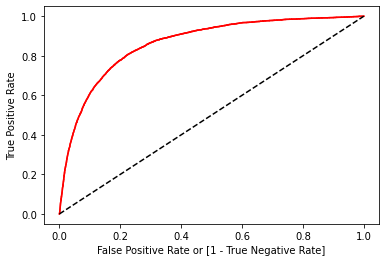

auc accuracy: 0.608439515288884


In [40]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)